Comparing Random Forest Classifier, Logistic Regression, SVM


1.   Random Forest = 96.85%
2.   Logistic Regression = 92.29%
3.   SVM-Linear = 92.40%
4.   SVM = 96.74%
5.   Decision Tree = 96.38%
6.   KNN = 94.86%
7.   Naive Bayes = 61.18%
8.   DNN = 96.09 %

Winner: **Random Forest**




In [0]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Training_Dataset_NoID.csv')
# dataset = dataset.drop('id',1)
print(dataset.columns)
#The last link above, he removed some features tbd

x = dataset.drop(['Result'], axis = 1).values
y = dataset['Result'].values
print(x.shape)
from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)
# print(len(x_train), len(x_test), len(y_train), len(y_test))
# print(type(x_train))
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique,counts)))

unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique,counts)))



Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')
(11055, 30)
{-1: 3457, 1: 4281}
{-1: 1441, 1: 1876}


https://towardsdatascience.com/industrial-classification-of-websites-by-machine-learning-with-hands-on-python-3761b1b530f1
https://www.kaggle.com/shubha23/identification-of-phishing-websites

Accuracy with RF classifier: 0.970756707868556
Conf matrix RF classifier: [[1380   61]
 [  36 1840]]


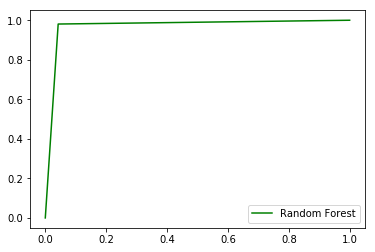

In [0]:
# Classifications Models
#1)Random Forest 
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 700, criterion = 'gini', max_features = 'sqrt', random_state = 0)
RFC = RFC.fit(x_train,y_train)
prediction = RFC.predict(x_test)
print("Accuracy with RF classifier:",accuracy_score(y_test, prediction))  ############################0.9685
fpr,tpr,thresh = roc_curve(y_test,prediction)      
roc_auc = accuracy_score(y_test,prediction)         # Calculate ROC AUC

# Plot ROC curve for Random Forest
plt.plot(fpr,tpr,'g',label = 'Random Forest')
plt.legend("Random Forest", loc='lower right')
plt.legend(loc='lower right')
print("Conf matrix RF classifier:",confusion_matrix(y_test,prediction))  #  Generate confusion matrix

In [0]:
feature_importances = pd.DataFrame(RFC.feature_importances_,index = dataset.iloc[:,:-1].columns,columns = ['importance']).sort_values('importance', ascending=False)
# print(feature_importances)

print(feature_importances.sort_values(by='importance', ascending=False))
print('-----------------------------------')
print(RFC.feature_importances_)
# scores = cross_val_score(RFC,y_test,y_l)

                             importance
SSLfinal_State                 0.316735
URL_of_Anchor                  0.242643
web_traffic                    0.074410
having_Sub_Domain              0.068941
Prefix_Suffix                  0.043691
Links_in_tags                  0.041233
Request_URL                    0.019638
SFH                            0.019430
Links_pointing_to_page         0.019266
age_of_domain                  0.017108
Domain_registeration_length    0.015886
having_IP_Address              0.014836
Google_Index                   0.013796
Page_Rank                      0.012595
DNSRecord                      0.012118
URL_Length                     0.008494
Redirect                       0.005899
HTTPS_token                    0.005855
having_At_Symbol               0.005400
Submitting_to_email            0.005349
Shortining_Service             0.005107
popUpWidnow                    0.005021
Statistical_report             0.004738
Abnormal_URL                   0.004386


                             importance
SSLfinal_State                 0.316735
URL_of_Anchor                  0.242643
web_traffic                    0.074410
having_Sub_Domain              0.068941
Prefix_Suffix                  0.043691
Links_in_tags                  0.041233
Request_URL                    0.019638
SFH                            0.019430
Links_pointing_to_page         0.019266
age_of_domain                  0.017108
Domain_registeration_length    0.015886
having_IP_Address              0.014836
Google_Index                   0.013796
Page_Rank                      0.012595
DNSRecord                      0.012118
URL_Length                     0.008494
Redirect                       0.005899
HTTPS_token                    0.005855
having_At_Symbol               0.005400
Submitting_to_email            0.005349
Shortining_Service             0.005107
popUpWidnow                    0.005021
Statistical_report             0.004738
Abnormal_URL                   0.004386


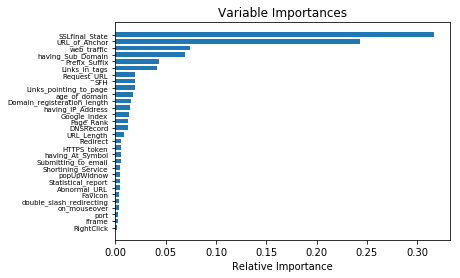

In [0]:
feature_importances = pd.DataFrame(RFC.feature_importances_,index = dataset.iloc[:,:-1].columns,columns = ['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# scores = cross_val_score(RFC,y_test,y_l)
#-------------Features Importance random forest
names = dataset.iloc[:,:-1].columns
print(type(names))
importances = RFC.feature_importances_
sorted_importances = sorted(importances,reverse=False)
indicies = np.argsort(importances)
var_imp = pd.DataFrame(sorted_importances, names[indicies], columns = ['importance'])

#-------------Print the feature ranking
print("\n ***Feature ranking: *** \nFeature name : Importance")
for f in reversed(range(len(names))):
    print(f"{f+1} {names[indicies[f]]}   :  {importances[indicies[f]]} \n")

#-------------plotting variable importance
import matplotlib.pyplot as plt
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.7)
plt.yticks(np.arange(len(names)), names[indicies], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()

In [0]:
#2) Logistic Regresison
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(x_train,y_train)
prediction = logreg.predict(x_test)
print("Accuracy with Log Reg:", accuracy_score(y_test, prediction)) ##0.9229
print ("Conf matrix Log Reg:",confusion_matrix(y_test,prediction))
fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)

# Plot ROC curve for Logistic Regression
plt.plot(fpr,tpr,'orange',label = 'Logistic Regression')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

In [0]:
# 3)SVM-Linear
#3 Classification using SVM
from sklearn.svm import SVC
svc_l = SVC(kernel = "linear", C = 0.025)
svc_l = svc_l.fit(x_train,y_train)
prediction = svc_l.predict(x_test)
print("Accuracy with SVM-Linear:",accuracy_score(y_test, prediction)) #0.924

fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)
# Plot ROC curve for SVM-linear
plt.plot(fpr,tpr,'b',label = 'SVM')
plt.legend("SVM", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix SVM-linear:",confusion_matrix(y_test,prediction))



In [0]:
# 3.a SVM No-linear
from sklearn.svm import SVC
svc_l = SVC(C=1000, kernel = 'rbf', gamma = 0.2 , random_state = 0)
svc_l = svc_l.fit(x_train,y_train)
prediction = svc_l.predict(x_test)
print("Accuracy with SVM:",accuracy_score(y_test, prediction)) #0.9674

fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)
# Plot ROC curve for SVM
plt.plot(fpr,tpr,'b',label = 'SVM')
plt.legend("SVM", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix SVM:",confusion_matrix(y_test,prediction))

plt.show()


In [0]:
# 4)Decision Tree
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)
prediction = DT.predict(x_test)
print("Accuracy with SVM-Linear:",accuracy_score(y_test, prediction)) #0.96

fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)
# Plot ROC curve for Decision Tree
plt.plot(fpr,tpr,'b',label = 'DT')
plt.legend("DT", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix Decision Tree:",confusion_matrix(y_test,prediction))

plt.show()


In [0]:
# 5) K-NN 
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 3)
Knn.fit(x_train,y_train)
prediction = Knn.predict(x_test)
print("Accuracy with KNN: ",accuracy_score(y_test,prediction)) #0.948

fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)
# Plot ROC curve for KNN
plt.plot(fpr,tpr,'b',label = 'KNN')
plt.legend("KNN", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix KNN:",confusion_matrix(y_test,prediction))

plt.show()


In [0]:
# 6) Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)
prediction = NB.predict(x_test)
print("Accuracy with NB: ",accuracy_score(y_test,prediction)) #0.6117

fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)
# Plot ROC curve for NB
plt.plot(fpr,tpr,'b',label = 'NB')
plt.legend("NB", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix Naive Bayes:",confusion_matrix(y_test,prediction))

plt.show()


Accuracy with DNN:  0.9532710280373832
Conf matrix DNN: [[1436   73]
 [  82 1726]]


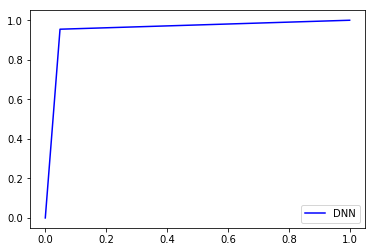

In [0]:
# 7) DNN
from sklearn.neural_network import MLPClassifier
DNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
DNN.fit(x_train,y_train)
prediction = DNN.predict(x_test)
print("Accuracy with DNN: ",accuracy_score(y_test,prediction)) #0.96092

fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)
# Plot ROC curve for DNN
plt.plot(fpr,tpr,'b',label = 'DNN')
plt.legend("DNN", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix DNN:",confusion_matrix(y_test,prediction))

plt.show()